#Начальные настройки и загрузка БД

In [1]:
!pip install h3

     |████████████████████████████████| 798kB 5.2MB/s 


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from statistics import mean
import pylab 
import matplotlib.pyplot as plt
from collections import Counter
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import tools
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.cluster import KMeans
from array import array
import math

In [3]:
data = pd.read_csv('/content/StudentsPerformance.csv')

In [4]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


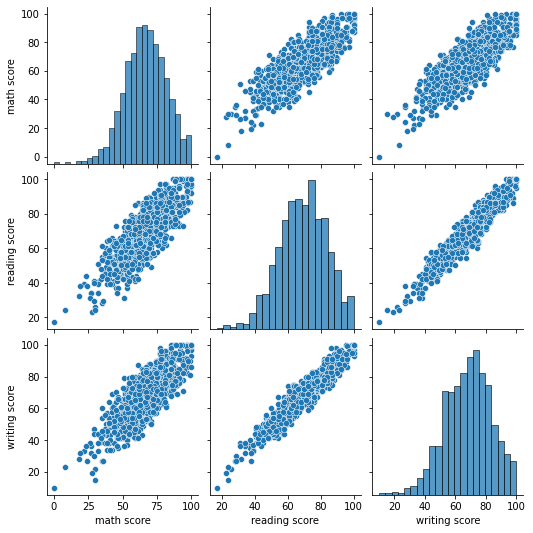

In [5]:
sns.pairplot(data)

#Введем границу проходного балла и посмотрим кто сдал экзамен, а кто нет


In [6]:
pass_score = 40

In [7]:
data['pass_math'] = np.where(data['math score'] > pass_score, 'P', 'F')
data['pass_read'] = np.where(data['reading score'] > pass_score, 'P', 'F')
data['pass_write'] = np.where(data['writing score'] > pass_score, 'P', 'F')

In [8]:
data.to_csv('pass_exam.csv')

# csv Для анализа результатов в различных этнических группах

In [9]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
data_race = data[['race/ethnicity','test preparation course']]

In [11]:
data_race_A = data_race.where(data_race['race/ethnicity'] == 'group A')
data_race_B = data_race.where(data_race['race/ethnicity'] == 'group B')
data_race_C = data_race.where(data_race['race/ethnicity'] == 'group C')
data_race_D = data_race.where(data_race['race/ethnicity'] == 'group D')
data_race_E = data_race.where(data_race['race/ethnicity'] == 'group E')

In [12]:
data_race_A = data_race_A[data_race_A['race/ethnicity'].notna()]
data_race_B = data_race_B[data_race_B['race/ethnicity'].notna()]
data_race_C = data_race_C[data_race_C['race/ethnicity'].notna()]
data_race_D = data_race_D[data_race_D['race/ethnicity'].notna()]
data_race_E = data_race_E[data_race_E['race/ethnicity'].notna()]

In [13]:
data_race_A.to_csv('data_race_A.csv')

In [14]:
data_race_B.to_csv('data_race_B.csv')

In [15]:
data_race_C.to_csv('data_race_C.csv')
data_race_D.to_csv('data_race_D.csv')
data_race_E.to_csv('data_race_E.csv')

In [16]:
data_race_A.value_counts()

race/ethnicity  test preparation course
group A         none                       58
                completed                  31
dtype: int64

#Кластеризация (не использовала)

In [17]:
data_cluster = pd.get_dummies(data, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'],
               drop_first=True, prefix=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'], prefix_sep='_')

In [18]:
data_cluster

,math score,reading score,writing score,pass_math,pass_read,pass_write,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard,test preparation course_none
0,72,72,74,P,P,P,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,P,P,P,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,P,P,P,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,P,P,P,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,P,P,P,1,0,1,0,0,0,0,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,P,P,P,0,0,0,0,1,0,0,1,0,0,1,0
996,62,55,55,P,P,P,1,0,1,0,0,0,1,0,0,0,0,1
997,59,71,65,P,P,P,0,0,1,0,0,0,1,0,0,0,0,0
998,68,78,77,P,P,P,0,0,0,1,0,0,0,0,1,0,1,0


In [19]:
data_cluster.rename(columns={'race/ethnicity_group B': 'race_B', 'race/ethnicity_group C': 'race_C', 'race/ethnicity_group D': 'race_D', 
                             'race/ethnicity_group E': 'race_E', 'parental level of education_bachelor\'s degree': 'parental_bachelor', 
                             'parental level of education_high school': 'parental_high_school', 'parental level of education_master\'s degree': 'parental_masters',
                             'parental level of education_some college': 'parental_some_college', 'parental level of education_some high school': 'parental_some_highschool'}, inplace=True)

In [20]:
data_cluster["average_score"] = ((data_cluster['math score'] + data_cluster['reading score'] + data_cluster['writing score']) / 3).round(2)

In [21]:
cluster_train_data = data_cluster.head(600)
cluster_test_data = data_cluster.tail(100)

In [22]:
cluster_train_data

,math score,reading score,writing score,pass_math,pass_read,pass_write,gender_male,race_B,race_C,race_D,race_E,parental_bachelor,parental_high_school,parental_masters,parental_some_college,parental_some_highschool,lunch_standard,test preparation course_none,average_score
0,72,72,74,P,P,P,0,1,0,0,0,1,0,0,0,0,1,1,72.67
1,69,90,88,P,P,P,0,0,1,0,0,0,0,0,1,0,1,0,82.33
2,90,95,93,P,P,P,0,1,0,0,0,0,0,1,0,0,1,1,92.67
3,47,57,44,P,P,P,1,0,0,0,0,0,0,0,0,0,0,1,49.33
4,76,78,75,P,P,P,1,0,1,0,0,0,0,0,1,0,1,1,76.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,56,79,72,P,P,P,0,0,1,0,0,1,0,0,0,0,1,0,69.00
596,30,24,15,F,F,F,1,1,0,0,0,0,1,0,0,0,0,1,23.00
597,53,54,48,P,P,P,1,0,0,0,0,0,0,0,0,1,1,1,51.67
598,69,77,73,P,P,P,0,0,0,1,0,0,1,0,0,0,1,1,73.00


In [23]:
train_X = cluster_train_data.drop(['average_score','math score',	'reading score',	'writing score'], axis=1)

In [24]:
train_Y = cluster_train_data.loc[:,'average_score']

In [25]:
test_X = cluster_test_data.drop(['average_score','math score',	'reading score',	'writing score'], axis=1)
test_Y = cluster_test_data.loc[:,'average_score']

In [26]:
# ssd = []
# for num_clusters in range(150):
#     kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
#     kmeans.fit(train_X, train_Y)
#     ssd.append(kmeans.inertia_)

In [27]:
categorial_column = data[['gender','race/ethnicity','parental level of education','lunch','test preparation course']]

In [28]:
categorial_column

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,female,group B,bachelor's degree,standard,none
1,female,group C,some college,standard,completed
2,female,group B,master's degree,standard,none
3,male,group A,associate's degree,free/reduced,none
4,male,group C,some college,standard,none
...,...,...,...,...,...
995,female,group E,master's degree,standard,completed
996,male,group C,high school,free/reduced,none
997,female,group C,high school,free/reduced,completed
998,female,group D,some college,standard,completed


In [29]:
ssd = []
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12, 13, 14,15,16, 17,18,19,20,21]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(data[['math score',	'reading score',	'writing score']])
    
    ssd.append(kmeans.inertia_)

In [30]:
ssd

[281951.8965908354,
 177501.5388480823,
 136363.80165653012,
 111305.3976686037,
 98100.17167656508,
 85749.9150652054,
 76824.07679288214,
 68494.74451778174,
 61619.849452613635,
 56130.80459792672,
 52817.7020045223,
 49694.97886919556,
 46591.46764552305,
 44435.30253870743,
 42193.26675200643,
 40407.5411128385,
 39023.49380647442,
 37855.660476390374,
 36341.07288435082,
 34660.95133593208]

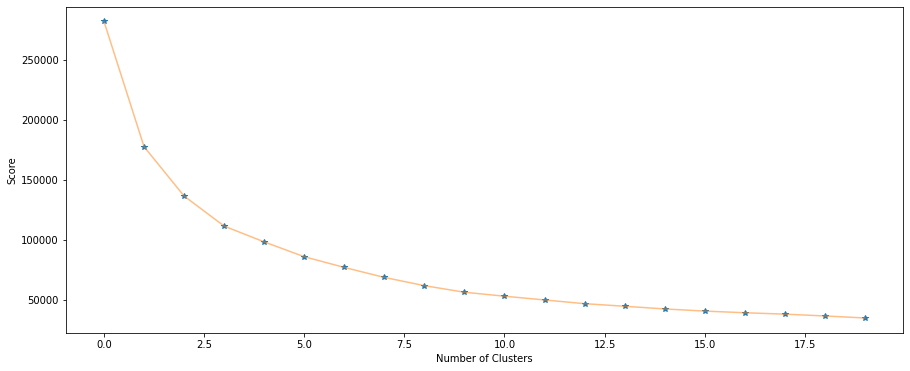

In [31]:
%matplotlib inline
plt.figure(1 , figsize = (15 ,6))
plt.plot(ssd , '*')
plt.plot(ssd , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Score')
plt.show()

In [32]:
score=data.loc[:,['math score',	'reading score',	'writing score']]
score.head(10)

,math score,reading score,writing score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
5,71,83,78
6,88,95,92
7,40,43,39
8,64,64,67
9,38,60,50


In [33]:
kmeans = KMeans(n_clusters = 11, init ='k-means++',max_iter=300,n_init=10,algorithm = 'elkan')
kmeans.fit(score[score.columns[1:3]]) 
score['cluster_label'] = kmeans.fit_predict(score[score.columns[1:3]])
labels = kmeans.predict(score[score.columns[1:3]]) 
centroids  = kmeans.cluster_centers_
centroid_labels = [centroids[i] for i in labels]
score['score'] = centroid_labels

In [34]:
score.head(15)

,math score,reading score,writing score,cluster_label,score
0,72,72,74,7,"[71.74342105263159, 70.41447368421053]"
1,69,90,88,8,"[88.032967032967, 88.34065934065931]"
2,90,95,93,1,"[96.79999999999998, 96.53333333333333]"
3,47,57,44,3,"[49.32051282051279, 47.14102564102562]"
4,76,78,75,2,"[76.5294117647059, 76.46323529411765]"
5,71,83,78,6,"[82.93457943925232, 80.83177570093457]"
6,88,95,92,1,"[96.79999999999998, 96.53333333333333]"
7,40,43,39,4,"[40.14634146341463, 38.34146341463415]"
8,64,64,67,0,"[66.00000000000001, 65.96610169491525]"
9,38,60,50,9,"[56.15789473684208, 53.56140350877191]"


In [35]:
d = {'cluster_label':[0,1,2,3,4,5,6,7,8,9,10],'score':[centroids[i] for i in set(labels)]}
score_info = pd.DataFrame(d)

In [36]:
score_info

,cluster_label,score
0,0,"[66.00000000000001, 65.96610169491525]"
1,1,"[96.79999999999998, 96.53333333333333]"
2,2,"[76.5294117647059, 76.46323529411765]"
3,3,"[49.32051282051279, 47.14102564102562]"
4,4,"[40.14634146341463, 38.34146341463415]"
5,5,"[61.46788990825689, 60.36697247706424]"
6,6,"[82.93457943925232, 80.83177570093457]"
7,7,"[71.74342105263159, 70.41447368421053]"
8,8,"[88.032967032967, 88.34065934065931]"
9,9,"[56.15789473684208, 53.56140350877191]"


#Корреляция

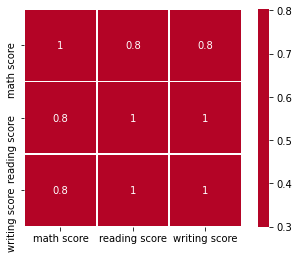

In [37]:
sns.heatmap(data[["gender", "race/ethnicity", "lunch", "math score", "reading score", "writing score","parental level of education"]].corr(), annot = True, fmt='.1g',
            cmap= 'coolwarm', vmax=0.3, center=0,square=True,linewidth=0.7);

In [38]:
data1 = data.replace({"male":1,"female":0})

In [39]:
data1 = data1.replace({"group A": 1, "group B": 2, "group C": 3, "group D": 4, "group E": 5})

In [40]:
data1 = data1.replace({"some high school":1, "high school":2, "some college":3 , "associate's degree":4 , "bachelor's degree":5, "master's degree":6})

In [41]:
data1 = data1.replace({"free/reduced":1, "standard":2})

In [42]:
data1 = data1.replace({"none":1, "completed":2})

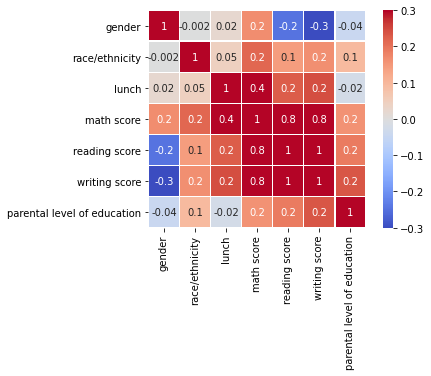

In [43]:
sns.heatmap(data1[["gender", "race/ethnicity", "lunch", "math score", "reading score", "writing score","parental level of education"]].corr(), annot = True, fmt='.1g',
            cmap= 'coolwarm', vmin= -0.3, vmax=0.3, center=0, square=True, linewidth=0.7);

In [44]:
data['total score'] = data['math score'] + data['reading score'] + data['writing score']

In [45]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,pass_math,pass_read,pass_write,total score
0,female,group B,bachelor's degree,standard,none,72,72,74,P,P,P,218
1,female,group C,some college,standard,completed,69,90,88,P,P,P,247
2,female,group B,master's degree,standard,none,90,95,93,P,P,P,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,P,P,P,148
4,male,group C,some college,standard,none,76,78,75,P,P,P,229
...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,P,P,P,282
996,male,group C,high school,free/reduced,none,62,55,55,P,P,P,172
997,female,group C,high school,free/reduced,completed,59,71,65,P,P,P,195
998,female,group D,some college,standard,completed,68,78,77,P,P,P,223


In [46]:
data.describe(percentiles=[.25, .5, .75])

,math score,reading score,writing score,total score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [47]:
data.quantile(0.75) - data.quantile(0.25)

math score       20.00
reading score    20.00
writing score    21.25
total score      58.00
dtype: float64

Метрика

#Размах 99 - 25 (Итоговая оценка в разрезе гендера и группы рассовой принадлежности)

In [48]:
new_frame = data[['gender','race/ethnicity', 'total score']]

In [49]:
new_frame

,gender,race/ethnicity,total score
0,female,group B,218
1,female,group C,247
2,female,group B,278
3,male,group A,148
4,male,group C,229
...,...,...,...
995,female,group E,282
996,male,group C,172
997,female,group C,195
998,female,group D,223


In [50]:
metrix_IQR = new_frame.groupby(['gender','race/ethnicity'], as_index=False).agg({'total score':lambda x: list(x)})
metrix_IQR

,gender,race/ethnicity,total score
0,female,group A,"[161, 182, 140, 195, 151, 166, 231, 124, 169, ..."
1,female,group B,"[218, 278, 232, 275, 148, 219, 78, 210, 189, 1..."
2,female,group C,"[247, 222, 173, 215, 211, 199, 213, 242, 117, ..."
3,female,group D,"[207, 217, 238, 173, 253, 207, 176, 194, 207, ..."
4,female,group E,"[193, 160, 253, 198, 205, 299, 151, 218, 248, ..."
5,male,group A,"[148, 220, 219, 112, 178, 239, 151, 154, 147, ..."
6,male,group B,"[122, 178, 170, 190, 176, 192, 175, 123, 139, ..."
7,male,group C,"[229, 164, 263, 134, 205, 170, 248, 139, 174, ..."
8,male,group D,"[195, 135, 198, 151, 225, 120, 241, 156, 175, ..."
9,male,group E,"[266, 241, 156, 214, 225, 78, 199, 193, 236, 2..."


In [51]:
c75 = []
c25 = []
for i in metrix_IQR['total score']:
  ds = pd.Series(i)
  c75.append(ds.quantile([.99]))
  c25.append(ds.quantile([.25]))
c25

[0.25    165.25
 dtype: float64, 0.25    184.0
 dtype: float64, 0.25    178.75
 dtype: float64, 0.25    187.0
 dtype: float64, 0.25    198.0
 dtype: float64, 0.25    154.0
 dtype: float64, 0.25    157.0
 dtype: float64, 0.25    168.0
 dtype: float64, 0.25    173.0
 dtype: float64, 0.25    192.0
 dtype: float64]

In [52]:
quantile99 = pd.DataFrame(c75)
quantile25 = pd.DataFrame(c25)
quantile99.rename(columns = {0.99:'q99'}, inplace = True)
quantile25.rename(columns = {0.25:'q25'}, inplace = True)

In [53]:
metrix_IQR_new = pd.concat([metrix_IQR ,quantile99,quantile25],axis = 1)
metrix_IQR_new

,gender,race/ethnicity,total score,q99,q25
0,female,group A,"[161, 182, 140, 195, 151, 166, 231, 124, 169, ...",281.65,165.25
1,female,group B,"[218, 278, 232, 275, 148, 219, 78, 210, 189, 1...",277.91,184.00
2,female,group C,"[247, 222, 173, 215, 211, 199, 213, 242, 117, ...",291.00,178.75
3,female,group D,"[207, 217, 238, 173, 253, 207, 176, 194, 207, ...",295.88,187.00
4,female,group E,"[193, 160, 253, 198, 205, 299, 151, 218, 248, ...",300.00,198.00
5,male,group A,"[148, 220, 219, 112, 178, 239, 151, 154, 147, ...",280.44,154.00
6,male,group B,"[122, 178, 170, 190, 176, 192, 175, 123, 139, ...",272.90,157.00
7,male,group C,"[229, 164, 263, 134, 205, 170, 248, 139, 174, ...",279.86,168.00
8,male,group D,"[195, 135, 198, 151, 225, 120, 241, 156, 175, ...",262.68,173.00
9,male,group E,"[266, 241, 156, 214, 225, 78, 199, 193, 236, 2...",295.10,192.00


In [54]:
metrix_IQR_new = metrix_IQR_new.drop(['total score'], axis = 1)
metrix_IQR_new.columns.tolist()

['gender', 'race/ethnicity', 'q99', 'q25']

In [55]:
metrix_IQR_new['Raz'] = metrix_IQR_new['q99'] - metrix_IQR_new['q25'] 
metrix_IQR_new = metrix_IQR_new.drop(['q99', 'q25'], axis = 1)
metrix_IQR_new

,gender,race/ethnicity,Raz
0,female,group A,116.40
1,female,group B,93.91
2,female,group C,112.25
3,female,group D,108.88
4,female,group E,102.00
5,male,group A,126.44
6,male,group B,115.90
7,male,group C,111.86
8,male,group D,89.68
9,male,group E,103.10


In [56]:
sorted_df = metrix_IQR_new.sort_values(by='Raz', ascending=False)
sorted_df

,gender,race/ethnicity,Raz
5,male,group A,126.44
0,female,group A,116.40
6,male,group B,115.90
2,female,group C,112.25
7,male,group C,111.86
3,female,group D,108.88
9,male,group E,103.10
4,female,group E,102.00
1,female,group B,93.91
8,male,group D,89.68


##1 вариант гистограммы

In [57]:
%matplotlib inline

gender = metrix_IQR_new['gender']
segment = ['female', 'male']
fig = go.Figure()

fig.add_trace(go.Bar(
    x = segment,
    y = [62.00, 55.00],
    name = 'group A',
    marker_color = 'LightSkyBlue'
))
fig.add_trace(go.Bar(
    x = segment,
    y = [48.25,58.25],
    name = 'group B',
    marker_color = 'Red'
))
fig.add_trace(go.Bar(
    x = segment,
    y = [53.25, 55.50],
    name = 'group C',
    marker_color = 'lightgreen'
))
fig.add_trace(go.Bar(
    x = segment,
    y = [52.00, 55.00],
    name = 'group D',
    marker_color = 'pink'
))
fig.add_trace(go.Bar(
    x = segment,
    y = [59.00, 49.00],
    name = 'group E',
    marker_color = 'MediumPurple'
))
fig.update_layout(barmode = 'group',
                  title='IQR Graf',
                  xaxis=dict(
                      title='Segment',
                      titlefont=dict(
                          family='Courier New, monospace',
                          color='#7f7f7f'
                      )
                  ),
                  yaxis=dict(
                      title='IQR',
                      titlefont=dict(
                          family='Courier New, monospace',
                          color='#7f7f7f'
                      )
                  ))
fig.show()

##2 вариант гистограммы

In [58]:
%matplotlib inline

gender = metrix_IQR_new['gender']
segment = ['group A', 'group B', 'group C', 'group D', 'group E']
fig = go.Figure()

fig.add_trace(go.Bar(
    x = segment,
    y = [62.00,	48.25, 53.25, 52.00, 59.00],
    name = 'female',
    marker_color = 'LightSkyBlue'
))
fig.add_trace(go.Bar(
    x = segment,
    y = [55.00, 58.25, 55.50, 55.00, 49.00],
    name = 'male',
    marker_color = 'pink'
))
fig.update_layout(barmode = 'group',
                  title='IQR Graf',
                  xaxis=dict(
                      title='Segment',
                      titlefont=dict(
                          family='Courier New, monospace',
                          color='#7f7f7f'
                      )
                  ),
                  yaxis=dict(
                      title='IQR',
                      titlefont=dict(
                          family='Courier New, monospace',
                          color='#7f7f7f'
                      )
                  ))
fig.show()

#t - тест (Test preparation course на итоговую оценку)

• H0 – средняя итоговая оценка людей, которые закончили подготовительные курсы и которые не проходили доп курсов не имеют значимых различий;

• H1 - средняя итоговая оценка людей, которые закончили подготовительные курсы и которые не проходили доп курсов имеют значимые различия

In [59]:
ttest_data_course = data[['test preparation course', 'math score',	'reading score',	'writing score']]
ttest_data_course

,test preparation course,math score,reading score,writing score
0,none,72,72,74
1,completed,69,90,88
2,none,90,95,93
3,none,47,57,44
4,none,76,78,75
...,...,...,...,...
995,completed,88,99,95
996,none,62,55,55
997,completed,59,71,65
998,completed,68,78,77


In [60]:
ttest_data_course['mean_score'] = (ttest_data_course['math score'] + ttest_data_course['reading score']	+ ttest_data_course['writing score']) / 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [61]:
ttest_data_course = ttest_data_course.round(2)

In [62]:
ttest_data_course = ttest_data_course.drop(['math score',	'reading score',	'writing score'], axis = 1)

In [177]:
#ttest_data_course = ttest_data_course.loc[ttest_data_course['mean_score'] > 40]

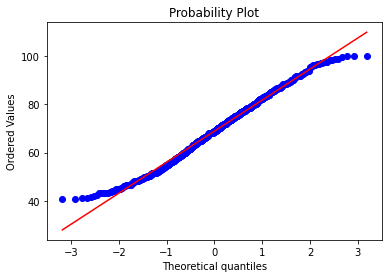

In [178]:
%matplotlib inline
stats.probplot(ttest_data_course['mean_score'], dist="norm", plot=plt)
plt.show()

In [64]:
ttest_data_course['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

In [65]:
#среднее значение
M1 = ttest_data_course[ttest_data_course['test preparation course'] == 'none'].mean()
M2 = ttest_data_course[ttest_data_course['test preparation course'] == 'completed'].mean()


In [66]:
M1 , M2

(mean_score    65.038801
 dtype: float64, mean_score    72.669469
 dtype: float64)

In [67]:
#количество элементов в выборках
n1 = len(ttest_data_course[ttest_data_course['test preparation course'] == 'none'])
n2 = len(ttest_data_course[ttest_data_course['test preparation course'] == 'completed'])

In [68]:
M1, M2, n1, n2

(mean_score    65.038801
 dtype: float64, mean_score    72.669469
 dtype: float64, 642, 358)

In [69]:
#дисперсии
var_a = np.var(ttest_data_course[ttest_data_course['test preparation course'] == 'none'],ddof = 1)
var_b = np.var(ttest_data_course[ttest_data_course['test preparation course'] == 'completed'],ddof = 1)

In [70]:
var_a = float(var_a)
var_b = float(var_b)

In [71]:
#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

In [72]:
t = (M1 - M2)/np.sqrt((((n1-1)*var_a + (n2-1)*var_b)/(n1+n2-2))*((1/n1)+(1/n2)))

In [73]:
t = float(t)

In [74]:
#найдем p-value
#степени свободы
df = (n1 + n2) - 2

#p - value
p = stats.t.cdf(t, df) * 2

if p > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)

Есть статистически значимая разница 
t - критерий =  -8.391130002701043 
p-value = 1.6313729799667205e-16


In [75]:
t

-8.391130002701043

##Проверила с помощью встроенной функции

In [76]:
t_test, p_value = stats.ttest_ind(ttest_data_course[ttest_data_course['test preparation course'] == 'none']['mean_score'], ttest_data_course[ttest_data_course['test preparation course'] == 'completed']['mean_score'])

In [77]:
t_test, p_value

(-8.391130002701122, 1.6313729799657097e-16)

In [78]:
p_value

1.6313729799657097e-16

In [79]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t_test,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t_test,'\np-value =',p_value)

Есть статистически значимая разница 
t - критерий =  -8.391130002701122 
p-value = 1.6313729799657097e-16


# t - тест (Lunch на итоговую оценку)

•	H0 – средние итоговая оценка людей которые поели стандартный обед и которые поели обед бесплатный не имеют значимых различий;

•	H1 - средние итоговая оценка людей которые поели стандартный обед и которые поели обед бесплатный имеют значимые различия

In [80]:
ttest_data = data[['lunch', 'math score',	'reading score',	'writing score']]
ttest_data

,lunch,math score,reading score,writing score
0,standard,72,72,74
1,standard,69,90,88
2,standard,90,95,93
3,free/reduced,47,57,44
4,standard,76,78,75
...,...,...,...,...
995,standard,88,99,95
996,free/reduced,62,55,55
997,free/reduced,59,71,65
998,standard,68,78,77


In [81]:
ttest_data['mean_score'] = (ttest_data['math score'] + ttest_data['reading score']	+ ttest_data['writing score']) / 3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [82]:
ttest_data = ttest_data.round(2)

In [83]:
ttest_data

,lunch,math score,reading score,writing score,mean_score
0,standard,72,72,74,72.67
1,standard,69,90,88,82.33
2,standard,90,95,93,92.67
3,free/reduced,47,57,44,49.33
4,standard,76,78,75,76.33
...,...,...,...,...,...
995,standard,88,99,95,94.00
996,free/reduced,62,55,55,57.33
997,free/reduced,59,71,65,65.00
998,standard,68,78,77,74.33


In [84]:
ttest_data = ttest_data.drop(['math score',	'reading score',	'writing score'], axis = 1)

In [85]:
ttest_data

,lunch,mean_score
0,standard,72.67
1,standard,82.33
2,standard,92.67
3,free/reduced,49.33
4,standard,76.33
...,...,...
995,standard,94.00
996,free/reduced,57.33
997,free/reduced,65.00
998,standard,74.33


In [86]:
ttest_data.to_csv('t_test_lunch_to_score.csv')

In [87]:
#среднее значение
M1 = ttest_data[ttest_data['lunch'] == 'free/reduced'].mean()
M2 = ttest_data[ttest_data['lunch'] == 'standard'].mean()

In [88]:
M1, M2

(mean_score    62.198986
 dtype: float64, mean_score    70.837116
 dtype: float64)

In [89]:
int(M1)

62

In [90]:
#количество элементов в выборках
n1 = len(ttest_data[ttest_data['lunch'] == 'free/reduced'])
n2 = len(ttest_data[ttest_data['lunch'] == 'standard'])

In [91]:
n1, n2

(355, 645)

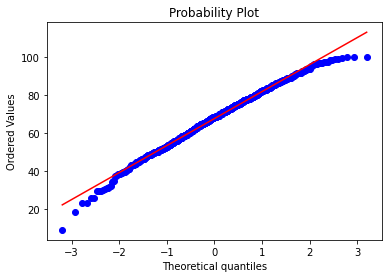

In [92]:
%matplotlib inline
stats.probplot(ttest_data['mean_score'], dist="norm", plot=plt)
plt.show()

In [93]:
#дисперсии
var_a = np.var(ttest_data[ttest_data['lunch'] == 'free/reduced'],ddof = 1)
var_b = np.var(ttest_data[ttest_data['lunch'] == 'standard'],ddof = 1)

In [94]:
var_a

mean_score    209.042033
dtype: float64

In [95]:
#стандартные отклонения
sd_a = np.sqrt(var_a)
sd_b = np.sqrt(var_b)

In [96]:
t = (M1 - M2)/np.sqrt((((n1-1)*var_a + (n2-1)*var_b)/(n1+n2-2))*((1/n1)+(1/n2)))

In [97]:
t

mean_score   -9.575103
dtype: float64

In [98]:
t = float(t)

In [99]:
#найдем p-value
#степени свободы
df = (n1 + n2) - 2

#p - value
p = stats.t.cdf(float(t), float(df)) * 2

if p > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t,'\np-value =',p)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t,'\np-value =',p)

Есть статистически значимая разница 
t - критерий =  -9.575102511506216 
p-value = 7.737514585089179e-21


In [100]:
ttest_data

,lunch,mean_score
0,standard,72.67
1,standard,82.33
2,standard,92.67
3,free/reduced,49.33
4,standard,76.33
...,...,...
995,standard,94.00
996,free/reduced,57.33
997,free/reduced,65.00
998,standard,74.33


In [101]:
ttest_data[ttest_data['lunch'] == 'free/reduced']

,lunch,mean_score
3,free/reduced,49.33
7,free/reduced,40.67
8,free/reduced,65.00
9,free/reduced,49.33
17,free/reduced,26.00
...,...,...
992,free/reduced,69.00
993,free/reduced,69.33
996,free/reduced,57.33
997,free/reduced,65.00


In [102]:
t2, p2 = stats.ttest_ind(ttest_data[ttest_data['lunch'] == 'free/reduced']['mean_score'],
                         ttest_data[ttest_data['lunch'] == 'standard']['mean_score'])

In [103]:
t2, p2

(-9.575102511506232, 7.737514585087955e-21)

#t-test (различия в оценках по математике в зависимости от пола)

*   H0 - Нет значимых различий между оценками по математике у мужчин и женщин
*   H1 - Есть значимые различия между оценками по математике у мужчин и женщин

In [104]:
ttest_data_score_math = data[['gender', 'math score']]

In [105]:
ttest_data_score_math

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76
...,...,...
995,female,88
996,male,62
997,female,59
998,female,68


In [106]:
ttest_data_score_math = ttest_data_score_math.loc[ttest_data_score_math['math score'] > 40]

In [107]:
ttest_data_score_math

,gender,math score
0,female,72
1,female,69
2,female,90
3,male,47
4,male,76
...,...,...
995,female,88
996,male,62
997,female,59
998,female,68


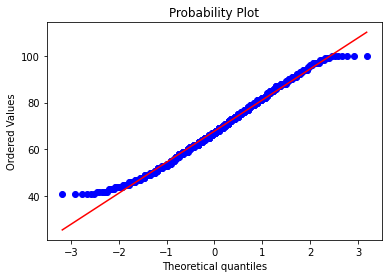

In [108]:
%matplotlib inline
stats.probplot(ttest_data_score_math['math score'], dist="norm", plot=plt)
plt.show()

In [109]:
t_test, p_value = stats.ttest_ind(ttest_data_score_math[ttest_data_score_math['gender'] == 'male']['math score'],
                                  ttest_data_score_math[ttest_data_score_math['gender'] == 'female']['math score'])

In [110]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t_test,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t_test,'\np-value =',p_value)

Есть статистически значимая разница 
t - критерий =  4.3012495916578555 
p-value = 1.8743453702804056e-05


# t - test (различия в оценках по чтению в зависимости от пола)

*   H0 - Нет значимых различий между оценками по чтению у мужчин и женщин
*   H1 - Есть значимые различия между оценками по чтению у мужчин и женщин

In [111]:
ttest_data_score_read = data[['gender', 'reading score']]

In [112]:
ttest_data_score_read = ttest_data_score_read.loc[ttest_data_score_read['reading score'] > 40]

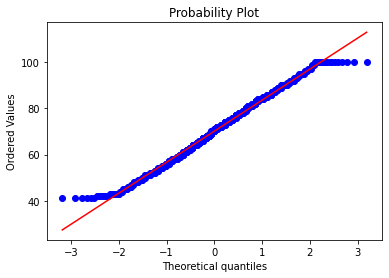

In [113]:
%matplotlib inline
stats.probplot(ttest_data_score_read['reading score'], dist="norm", plot=plt)
plt.show()

In [114]:
t_test, p_value = stats.ttest_ind(ttest_data_score_read[ttest_data_score_read['gender'] == 'male']['reading score'],
                                ttest_data_score_read[ttest_data_score_read['gender'] == 'female']['reading score'])

In [115]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t_test,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t_test,'\np-value =',p_value)

Есть статистически значимая разница 
t - критерий =  -8.445974877596495 
p-value = 1.0893817565662533e-16


## t - test (различия в оценках по письму в зависимости от пола)

*   H0 - Нет значимых различий между оценками по письму у мужчин и женщин
*   H1 - Есть значимые различия между оценками по письму у мужчин и женщин

In [116]:
ttest_data_score_write = data[['gender', 'writing score']]

In [117]:
ttest_data_score_write = ttest_data_score_write.loc[ttest_data_score_write['writing score'] > 40]

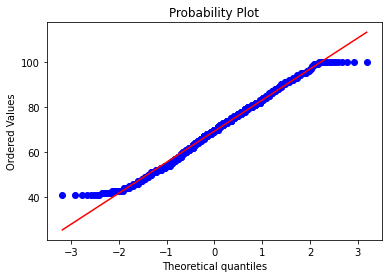

In [118]:
%matplotlib inline
stats.probplot(ttest_data_score_write['writing score'], dist="norm", plot=plt)
plt.show()

In [119]:
t_test, p_value = stats.ttest_ind(ttest_data_score_write[ttest_data_score_write['gender'] == 'male']['writing score'],
                                  ttest_data_score_write[ttest_data_score_write['gender'] == 'female']['writing score'])

In [120]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nt - критерий = ',t_test,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nt - критерий = ',t_test,'\np-value =',p_value)

Есть статистически значимая разница 
t - критерий =  -10.797094918474059 
p-value = 9.864614216823529e-26


#Однофакторный дисперсионный анализ средней оценки по расовым группам

H0 - Нет значимых различий между средними оценками по предметом у различных расовых групп 

H1 - Есть значимые различия между между средними оценками по предметом у различных расовых групп

In [121]:
ftest_data_gpa = data[['race/ethnicity','math score', 'reading score', 'writing score']]

In [122]:
ftest_data_gpa['mean_score'] = ((ftest_data_gpa['math score'] + ftest_data_gpa['reading score'] + ftest_data_gpa['writing score'])/3).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [123]:
ftest_data_gpa = ftest_data_gpa.drop(['math score',	'reading score',	'writing score'], axis = 1)

In [124]:
ftest_data_gpa = ftest_data_gpa.loc[ftest_data_gpa['mean_score'] > 20]

In [125]:
ftest_data_gpa

,race/ethnicity,mean_score
0,group B,72.67
1,group C,82.33
2,group B,92.67
3,group A,49.33
4,group C,76.33
...,...,...
995,group E,94.00
996,group C,57.33
997,group C,65.00
998,group D,74.33


In [151]:
ftest_data_gpa = ftest_data_gpa.loc[ftest_data_gpa['mean_score'] > 40]

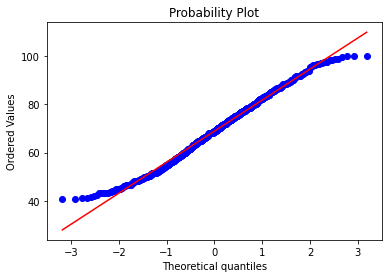

In [152]:
%matplotlib inline
stats.probplot(ftest_data_gpa['mean_score'], dist="norm", plot=plt)
plt.show()

In [153]:
group_a = ftest_data_gpa[ftest_data_gpa['race/ethnicity'] == 'group A']['mean_score']
group_b = ftest_data_gpa[ftest_data_gpa['race/ethnicity'] == 'group B']['mean_score']
group_c = ftest_data_gpa[ftest_data_gpa['race/ethnicity'] == 'group C']['mean_score']
group_d = ftest_data_gpa[ftest_data_gpa['race/ethnicity'] == 'group D']['mean_score']
group_e = ftest_data_gpa[ftest_data_gpa['race/ethnicity'] == 'group E']['mean_score']

In [154]:
n_group_a = len(group_a)
n_group_b = len(group_b)
n_group_c = len(group_c)
n_group_d = len(group_d)
n_group_e = len(group_e)

Число классов градации фактора (групп) a = 5

In [155]:
a = 5

Число наблюдений в группах

In [156]:
n_group_a, n_group_b, n_group_c, n_group_d, n_group_e

(86, 182, 309, 254, 137)

Среднее x_mean

In [157]:
x_a = group_a.sum() / n_group_a
x_b = group_b.sum() / n_group_b
x_c = group_c.sum() / n_group_c
x_d = group_d.sum() / n_group_d
x_e = group_e.sum() / n_group_e

In [158]:
x_a, x_b, x_c, x_d, x_c

(64.02686046511627,
 67.08439560439561,
 68.2642071197411,
 70.18499999999999,
 68.2642071197411)

Дисперсия

In [159]:
#дисперсии
var_a = np.var(group_a,ddof = 1)
var_b = np.var(group_b,ddof = 1)
var_c = np.var(group_c,ddof = 1)
var_d = np.var(group_d,ddof = 1)
var_e = np.var(group_e,ddof = 1)

In [160]:
var_a, var_b, var_c, var_d, var_e

(182.09846649794798,
 162.78340377633418,
 155.26381406085824,
 147.55570415019758,
 181.45915873765574)

 Общее число наблюдений n_all

In [161]:
 n_all = len(ftest_data_gpa)

Числа степеней свободы:

va = a − 1,

ve = n_all − a 

v = n_all − 1 

In [162]:
va = 4
ve = n_all - a
v = n_all - 1

Вычислим суммы квадратов отклонений

In [163]:
sum_a = group_a.sum()

In [164]:
sum_a

5506.3099999999995

In [165]:
A__ = ((group_a.sum() + group_b.sum() + group_c.sum() + group_d.sum() + group_e.sum()) / n_all).round(2)

In [166]:
A__

68.93

In [167]:
SSa = n_group_a * (x_a - A__)**2 + n_group_b * (x_b - A__)**2 + n_group_c * (x_c.sum() - A__)**2 + 
n_group_d * (x_d.sum() - A__)**2 + n_group_e * (x_e.sum() - A__)**2

In [168]:
SSa

6225.478495092424

In [169]:
SSe = (n_group_a - 1) * var_a + (n_group_b - 1) * var_b + (n_group_c - 1) * var_c + 
(n_group_d - 1) * var_d + (n_group_e - 1) * var_e 

In [170]:
SSe

154773.45920490756

Вычислим дисперсии:

In [171]:
MSa = SSa / va
MSe = SSe / ve

In [172]:
MSa, MSe

(1556.369623773106, 160.72010301651875)

Вычислим фактическое отношение Фишера:

In [173]:
A = (MSa / MSe).round(2)
A

9.68

In [174]:
f_value, p_value = stats.f_oneway(group_a,group_b, group_c, group_d, group_e)

In [175]:
f_value, p_value

(9.683709322562734, 1.1124006299645788e-07)

In [176]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nF - критерий = ',f_value,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nF - критерий = ',f_value,'\np-value =',p_value)

Есть статистически значимая разница 
F - критерий =  9.683709322562734 
p-value = 1.1124006299645788e-07


#Однофакторный дисперсионный анализ средней оценки в зависимости от образования родителей

H0 - Нет значимых различий между средними оценками студентов,в зависимости от образования родителей

H1 - Есть значимые различия между между средними оценками студентов,в зависимости от образования родителей

In [179]:
ftest_data_ple = data[['parental level of education','math score', 'reading score', 'writing score']]

In [180]:
ftest_data_ple['mean_score'] = ((ftest_data_ple['math score'] + ftest_data_ple['reading score'] + ftest_data_ple['writing score'])/3).round(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [181]:
ftest_data_ple = ftest_data_ple.drop(['math score',	'reading score',	'writing score'], axis = 1)

In [182]:
ftest_data_ple = ftest_data_ple.loc[ftest_data_ple['mean_score'] > 40]

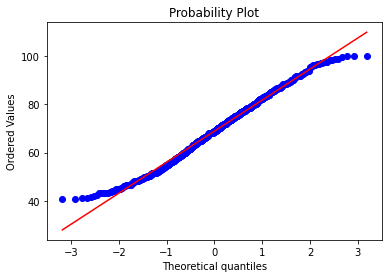

In [183]:
%matplotlib inline
stats.probplot(ftest_data_ple['mean_score'], dist="norm", plot=plt)
plt.show()

In [184]:
group_hs = ftest_data_ple[ftest_data_ple['parental level of education'] == 'high school']['mean_score']
group_shs = ftest_data_ple[ftest_data_ple['parental level of education'] == 'some high school']['mean_score']
group_sc = ftest_data_ple[ftest_data_ple['parental level of education'] == 'some college']['mean_score']
group_ab = ftest_data_ple[ftest_data_ple['parental level of education'] == 'associate\'s degree']['mean_score']
group_bb = ftest_data_ple[ftest_data_ple['parental level of education'] == 'bachelor\'s degree']['mean_score']
group_mb = ftest_data_ple[ftest_data_ple['parental level of education'] == 'master\'s degree']['mean_score']

In [185]:
f_value, p_value = stats.f_oneway(group_hs,group_shs, group_sc, group_ab, group_bb, group_mb)

In [186]:
if p_value > 0.05:
    print('Нет статистически значимой разницы','\nF - критерий = ',f_value,'\np-value =',p_value)
else:
    print('Есть статистически значимая разница','\nF - критерий = ',f_value,'\np-value =',p_value)

Есть статистически значимая разница 
F - критерий =  8.843918251803245 
p-value = 3.2114391169980125e-08
